# Feature Engineering

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. (wikipedia)

In [1]:
from modules.utils import get_data,is_day_off
df = get_data()

In [7]:
df.sample(20)

,Date,Conso,Temp
12745,2013-09-23 12:00:00,8122.0,295.256667
81857,2017-09-02 08:00:00,6209.0,287.580000
58118,2016-04-25 18:30:00,9742.0,280.890000
5611,2013-04-27 21:00:00,8511.0,280.360000
58301,2016-04-29 14:00:00,8693.0,285.890000
1104,2013-01-23 23:30:00,11463.0,274.800000
42098,2015-05-28 00:30:00,5452.0,286.151083
33344,2014-11-26 15:30:00,9958.0,285.264750
1031,2013-01-22 11:00:00,14320.0,273.040000
70598,2017-01-10 18:30:00,12790.0,278.895000


## Currently what is $X$ and what is $Y$ ?

## Workshop : find some new features (15min)
Only use available data: 
- Consumption for each day
- Temperature for each day
- is_day_off function

# New feature : is_day_off

In [4]:
def compute_day_off(date):
    if is_day_off(date):
        return 1
    return 0

df['is_day_off'] = df['Date'].apply(compute_day_off)

In [5]:
df.head()

,Date,Conso,Temp,is_day_off
1,2013-01-01 00:00:00,8822.0,278.91,1
2,2013-01-01 00:30:00,8499.0,278.91,1
3,2013-01-01 01:00:00,8229.0,278.91,1
4,2013-01-01 01:30:00,8150.0,278.91,1
5,2013-01-01 02:00:00,7848.0,278.91,1


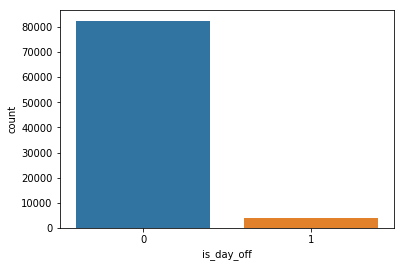

In [6]:
import seaborn as sns
%matplotlib inline

sns.countplot(df['is_day_off'])

## New feature : conso_24h_lag
Since we have all half hours per day, we can safely make a shift of the dataset to get the 24h consumption lag !  
We can also use 24 lag values since we are only predicting for the next day  
Thanks to cleaning step 

In [9]:
df['conso_24_lag'] = df['Conso'].shift(48)

In [10]:
df.tail()

,Date,Conso,Temp,conso_24_lag
86429,2017-12-06 14:00:00,11880.0,279.151265,12058.0
86430,2017-12-06 14:30:00,11710.0,279.151265,11880.0
86431,2017-12-06 15:00:00,11737.0,279.151265,11710.0
86432,2017-12-06 15:30:00,11713.0,279.151265,11737.0
86433,2017-12-06 16:00:00,11870.0,279.151265,11713.0


In [18]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter( x=df[:200]['Date'], y=(df[:200]['Conso'])),go.Scatter( x=df[:200]['Date'], y=(df[:200]['conso_24_lag']))]
py.plot(data)

'file:///Users/lucasberbesson/codeproject/datascience/ds2/temp-plot.html'

## New feature : conso_7_days_lag

In [11]:
df['conso_7_days_lag'] = df['Conso'].shift(336)

In [12]:
df.sample(10)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag
46376,2015-08-25 03:30:00,4985.0,284.455000,0,4638.0,4604.0
76006,2017-05-03 10:30:00,9668.0,283.650000,0,8824.0,9694.0
63746,2016-08-21 00:30:00,4482.0,288.855000,0,4539.0,4453.0
11683,2013-09-01 09:00:00,6058.0,287.224000,0,6556.0,5627.0
19070,2014-02-02 06:30:00,8781.0,274.840000,0,8965.0,8463.0
32679,2014-11-12 19:00:00,10636.0,282.182333,0,9520.0,10711.0
12372,2013-09-15 17:30:00,7102.0,289.525000,0,7402.0,6393.0
65414,2016-09-24 18:30:00,7006.0,292.370000,0,7752.0,7063.0
77654,2017-06-06 18:30:00,7315.0,288.250000,0,6803.0,7481.0
35412,2015-01-08 17:30:00,12463.0,281.748167,0,13625.0,11017.0


# New feature : is_weekend

In [13]:
from datetime import datetime

def is_weekend(date):
    if date.weekday() >=5:
        return 1
    return 0

df['is_weekend'] = df['Date'].apply(is_weekend)

In [14]:
df.sample(10)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag,is_weekend
38362,2015-03-11 04:30:00,7941.0,279.402500,0,7511.0,9081.0,0
45272,2015-08-02 03:30:00,4325.0,284.750000,0,4572.0,4529.0,1
70034,2016-12-30 00:30:00,10155.0,270.390000,0,9424.0,8849.0,0
49356,2015-10-26 05:30:00,7535.0,281.853583,0,6078.0,9545.0,0
80735,2017-08-09 23:00:00,5016.0,285.430000,0,4936.0,5286.0,0
1970,2013-02-11 00:30:00,10133.0,273.150000,0,10474.0,9476.0,0
11655,2013-08-31 19:00:00,6585.0,293.536000,0,6991.0,5900.0,1
31430,2014-10-17 18:30:00,8532.0,289.065583,0,8876.0,8424.0,0
17937,2014-01-09 16:00:00,10702.0,283.040000,0,10095.0,10168.0,0
50169,2015-11-12 04:00:00,5920.0,285.568015,0,5950.0,6008.0,0


# New feature : day_of_week

In [23]:
df['day_of_week']=df['Date'].dt.weekday

In [24]:
df.sample(5)

,Date,Conso,Temp,is_day_off,conso_24_lag,conso_7_days_lag,is_weekend,day_of_week
40164,2015-04-17 17:30:00,7876.0,288.4155,0,8164.0,7973.0,0,4
80972,2017-08-14 21:30:00,5826.0,293.7150,0,5726.0,5989.0,0,0
40848,2015-05-01 23:30:00,6765.0,281.2545,1,6753.0,5749.0,0,4
54763,2016-02-15 21:00:00,11144.0,274.4700,0,10226.0,9869.0,0,0
9057,2013-07-08 16:00:00,7923.0,301.4900,0,6090.0,7757.0,0,0


# New feature : temp_rolling_7_days

In [4]:
df["temp_rolling_7_days"] = df["Temp"].rolling(window=336).mean()

In [5]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter( x=df[:10000]['Date'], y=(df[:10000]['Temp'])),go.Scatter( x=df[:10000]['Date'], y=(df[:10000]['temp_rolling_7_days']))]
py.plot(data)

'file:///Users/lucasberbesson/codeproject/datascience/ds2/temp-plot.html'

# Automate everyting

In [34]:
def compute_day_off(date):
    if is_day_off(date):
        return 1
    return 0


def is_weekend(date):
    if date.weekday() >=5:
        return 1
    return 0


def get_data_with_features(consumption_csv="./data/eco2mix_regional_cons_def.csv",weather_csv="./data/meteo-paris.csv"):
    """
    A function to get consumption and weather data
    Do the wrangling
    Add interesting features
    
    """
    df = get_data(consumption_csv,weather_csv)
    df['is_day_off'] = df['Date'].apply(compute_day_off)
    df['conso_24_lag'] = df['Conso'].shift(48)
    df['temp_24_lag'] = df['Temp'].shift(48)
    df['conso_7_days_lag'] = df['Conso'].shift(336)
    df['is_weekend'] = df['Date'].apply(is_weekend)
    df['day_of_week']=df['Date'].dt.weekday
    df["temp_rolling_7_days"] = df["Temp"].rolling(window=336).mean()
    df['month']=df['Date'].dt.month
    #df.set_index("Date",inplace=True)
    return df.dropna()

In [35]:
df = get_data_with_features()

In [36]:
df.tail(49)

,Date,Conso,Temp,is_day_off,conso_24_lag,temp_24_lag,conso_7_days_lag,is_weekend,day_of_week,temp_rolling_7_days,month
86385,2017-12-05 16:00:00,11773.0,280.150000,0,11854.0,280.720000,10950.0,0,1,275.407479,12
86386,2017-12-05 16:30:00,12115.0,280.005000,0,12356.0,280.575000,11474.0,0,1,275.410247,12
86387,2017-12-05 17:00:00,12211.0,279.860000,0,12411.0,280.430000,11616.0,0,1,275.413640,12
86388,2017-12-05 17:30:00,12349.0,279.720000,0,12460.0,280.290000,11816.0,0,1,275.417673,12
86389,2017-12-05 18:00:00,12541.0,279.580000,0,12666.0,280.150000,12082.0,0,1,275.422345,12
86390,2017-12-05 18:30:00,12479.0,279.580000,0,12652.0,279.935000,12133.0,0,1,275.427450,12
86391,2017-12-05 19:00:00,12385.0,279.580000,0,12459.0,279.720000,11983.0,0,1,275.432985,12
86392,2017-12-05 19:30:00,11992.0,279.505000,0,12152.0,279.650000,11497.0,0,1,275.439146,12
86393,2017-12-05 20:00:00,11628.0,279.430000,0,11718.0,279.580000,11144.0,0,1,275.445932,12
86394,2017-12-05 20:30:00,11132.0,279.401417,0,11208.0,279.505000,10845.0,0,1,275.454552,12


In [38]:
avg_week = df.set_index('Date').resample('W-MON').mean()

In [39]:
avg_week["year"] = avg_week.index.year
avg_week["week"] = avg_week.index.week


In [40]:
avg_week.head()

,Conso,Temp,is_day_off,conso_24_lag,temp_24_lag,conso_7_days_lag,is_weekend,day_of_week,temp_rolling_7_days,month,year,week
Date,,,,,,,,,,,,
2013-01-14,10948.508929,277.831213,0.0,10662.764881,278.518237,9583.300595,0.285714,3.0,279.662275,1.000000,2013,3
2013-01-21,12801.032738,271.093679,0.0,12725.928571,271.772280,10948.508929,0.285714,3.0,274.428945,1.000000,2013,4
2013-01-28,12247.416667,274.279289,0.0,12448.797619,273.208600,12801.032738,0.285714,3.0,272.151599,1.000000,2013,5
2013-02-04,10497.398810,280.784013,0.0,10586.544643,281.093306,12247.416667,0.285714,3.0,278.600423,1.571429,2013,6
2013-02-11,11455.086310,276.797568,0.0,11368.062500,277.103324,10497.398810,0.285714,3.0,278.707101,2.000000,2013,7


In [45]:
def get_last_week_avg_temp(date):
    year = date.year
    week = date.week-1
    print(year, week, "\r")
    return avg_week[(avg_week["year"]==year) & (avg_week["week"]==week)].mean()
    
df["last_week_avg_temp"] = df["Date"].apply(get_last_week_avg_temp)

2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 
2013 1 


2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 
2013 4 


2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 
2013 7 


2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2013 10 
2

2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2013 13 
2

2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2013 16 
2

2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 18 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2013 19 
2

2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2013 21 
2

2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2013 24 
2

2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2013 27 
2

2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 29 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2013 30 
2

2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2013 32 
2

2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2013 35 
2

2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2013 38 
2

2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2013 41 
2

2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2013 44 
2

2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2013 47 
2

2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2013 50 
2

2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 
2014 1 


2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 
2014 4 


2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 7 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 
2014 8 


2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2014 11 
2

2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 13 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2014 14 
2

2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 16 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2014 17 
2

2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 19 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2014 20 
2

2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2014 22 
2

2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2014 25 
2

2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2014 28 
2

2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2014 31 
2

2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2014 34 
2

2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2014 37 
2

2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2014 40 
2

2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 42 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2014 43 
2

2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 45 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2014 46 
2

2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2014 48 
2

2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2014 51 
2

2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 
2015 2 


2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 5 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 
2015 6 


2015 8 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 
2015 9 


2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2015 12 
2

2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 14 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2015 15 
2

2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 17 
2015 18 
2015 18 
2015 18 
2015 18 
2

KeyboardInterrupt: 

In [ ]:
df[df["Date"].dt.weekday==0 & df["Date"].dt.month=1]